In [1]:
# prompt: 구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setting

In [2]:
!pip install --upgrade prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 6.4 MB/s eta 0:00:00


In [3]:
!pip install faker prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.3 MB/s eta 0:00:00


In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 13s (772 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

In [30]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.2 MB/s eta 0:00:00


In [31]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import random
import uuid
from datetime import datetime, timedelta
import json
import faker
import warnings

import pandas as pd
import prince
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

import koreanize_matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D 플롯을 위한 모듈 import
import seaborn as sns
import plotly.express as px

In [6]:
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns', None)  # Display all columns

# 1. Preprocessing ~ EDA

## 데이터

In [8]:
df = pd.read_csv('/content/drive/MyDrive/FDS/synthetic_transaction_data.csv')
df.head()

,transaction_time,TransactionDT,recipient,TransactionAmt,hour,voice_match,DeviceInfo,region,receiver_bank,receiver_account,is_new_account_for_user,avg_amount_to_bank,amount_ratio_to_bank_avg,is_nighttime,recent_transaction_gap,is_new_device,ip_address,vpn,payment_method,intent,authentication,app_version,rooting
0,2025-01-14 09:56:23,86400,춘자,68500.0,9,True,Unknown,대구,토스뱅크,1000000266274,False,481616,0.142229,0,14.932585,False,58.232.2.170,False,P04,T05,A06,3.1.0,False
1,2025-04-20 22:42:41,86401,수빈,29000.0,22,False,Unknown,대구,카카오뱅크,1000000573349,True,79943,0.362758,0,21.894439,False,25.0.3.185,False,P05,T02,A02,3.4.3,False
2,2025-04-09 19:27:13,86469,서준,59000.0,19,True,Unknown,부산,신한은행,1000000451208,False,218283,0.270291,0,17.249459,False,168.188.65.132,True,P01,T05,A06,1.2.1,True
3,2025-01-30 01:26:54,86499,병철,50000.0,1,True,Unknown,부산,카카오뱅크,1000000473588,False,457390,0.109316,1,12.112011,True,158.221.28.126,True,P05,T05,A02,3.8.1,True
4,2025-01-24 22:58:30,86506,민수,50000.0,22,True,SAMSUNG SM-G892A Build/NRD90M,서울,우리은행,1000000040287,False,289443,0.172746,0,75.834574,True,171.223.101.73,True,P04,T02,A02,3.6.0,True


- 시간: transaction_time, hour, is_nighttime
- 식별자: TransactionDT, recipient, region, DeviceInfo, receiver_bank,receiver_account, ip_address, app_version
- 카테고리, binary: voice_match, is_new_account_for_user, is_nighttime, is_new_device, vpn, payment_method, intent, authentication, rooting

--------------------------------------------------------------------------------------------------------
- grouping value: 시간(특정 시간대 - is_nighttme과 같은), voice_match, is_new_account_for_user, is_nighttime, is_new_device, vpn, payment_method, intent, authentication, rooting

## Cleansing

### describtive stats

In [9]:
df.head(3)

,transaction_time,TransactionDT,recipient,TransactionAmt,hour,voice_match,DeviceInfo,region,receiver_bank,receiver_account,is_new_account_for_user,avg_amount_to_bank,amount_ratio_to_bank_avg,is_nighttime,recent_transaction_gap,is_new_device,ip_address,vpn,payment_method,intent,authentication,app_version,rooting
0,2025-01-14 09:56:23,86400,춘자,68500.0,9,True,Unknown,대구,토스뱅크,1000000266274,False,481616,0.142229,0,14.932585,False,58.232.2.170,False,P04,T05,A06,3.1.0,False
1,2025-04-20 22:42:41,86401,수빈,29000.0,22,False,Unknown,대구,카카오뱅크,1000000573349,True,79943,0.362758,0,21.894439,False,25.0.3.185,False,P05,T02,A02,3.4.3,False
2,2025-04-09 19:27:13,86469,서준,59000.0,19,True,Unknown,부산,신한은행,1000000451208,False,218283,0.270291,0,17.249459,False,168.188.65.132,True,P01,T05,A06,1.2.1,True


In [10]:
df.describe()

,TransactionDT,TransactionAmt,hour,receiver_account,avg_amount_to_bank,amount_ratio_to_bank_avg,is_nighttime,recent_transaction_gap
count,5.905400e+05,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000
mean,7.372311e+06,1.350272e+05,11.488983,1.000000e+12,274914.045404,0.690455,0.249954,59.940860
std,4.617224e+06,2.391625e+05,6.916342,1.704744e+05,130046.940884,1.730791,0.432987,59.966415
min,8.640000e+04,2.510000e+02,0.000000,1.000000e+12,50000.000000,0.000758,0.000000,0.000060
25%,3.027058e+06,4.332100e+04,6.000000,1.000000e+12,162130.750000,0.150364,0.000000,17.236091
50%,7.306528e+06,6.876900e+04,11.000000,1.000000e+12,274933.500000,0.302835,0.000000,41.580089
75%,1.124662e+07,1.250000e+05,17.000000,1.000000e+12,387516.250000,0.664110,0.000000,82.976318
max,1.581113e+07,3.193739e+07,23.000000,1.000001e+12,499999.000000,606.264185,1.000000,784.041638


In [11]:
# df.drop('is_fraud', axis = 1, inplace = True)
df.dtypes

,0
transaction_time,object
TransactionDT,int64
recipient,object
TransactionAmt,float64
hour,int64
voice_match,bool
DeviceInfo,object
region,object
receiver_bank,object
receiver_account,int64


In [12]:
identity = ['TransactionDT', 'recipient', 'DeviceInfo', 'region', 'receiver_bank','receiver_account', 'ip_address', 'app_version']
categories_col = ['voice_match', 'is_new_account_for_user', 'is_nighttime', 'is_new_device', 'vpn', 'payment_method', 'intent', 'authentication', 'rooting']
numerics_col = ['TransactionAmt', 'hour', 'avg_amount_to_bank', 'recent_transaction_gap'] #float32

In [13]:
for item in ['user_id', 'recipient', 'device_id', 'region', 'receiver_bank', 'ip_address', 'app_version']: # region -> 시/도 단위일 경우 인코딩 고려해볼 수 있음
    if item in categories_col:
        categories_col.remove(item)

for item in ['is_new_account_for_user', 'is_nighttime', 'is_new_device', 'vpn', 'rooting']:
    if item in numerics_col:
        numerics_col.remove(item)

id_col = ['user_id', 'recipient', 'device_id', 'receiver_bank', 'ip_address']
boolean_col = ['is_new_account_for_user', 'is_nighttime', 'is_new_device', 'vpn', 'rooting']

In [14]:
display(identity, categories_col, numerics_col) # numerical + categorical 변수만 사용 예정

['TransactionDT',
 'recipient',
 'DeviceInfo',
 'region',
 'receiver_bank',
 'receiver_account',
 'ip_address',
 'app_version']

['voice_match',
 'is_new_account_for_user',
 'is_nighttime',
 'is_new_device',
 'vpn',
 'payment_method',
 'intent',
 'authentication',
 'rooting']

['TransactionAmt', 'hour', 'avg_amount_to_bank', 'recent_transaction_gap']

### 결측값 처리(Skip)

In [15]:
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("결측값 비율:\n", missing_ratio)

결측값 비율:
 transaction_time            0.0
TransactionDT               0.0
recipient                   0.0
TransactionAmt              0.0
hour                        0.0
voice_match                 0.0
DeviceInfo                  0.0
region                      0.0
receiver_bank               0.0
receiver_account            0.0
is_new_account_for_user     0.0
avg_amount_to_bank          0.0
amount_ratio_to_bank_avg    0.0
is_nighttime                0.0
recent_transaction_gap      0.0
is_new_device               0.0
ip_address                  0.0
vpn                         0.0
payment_method              0.0
intent                      0.0
authentication              0.0
app_version                 0.0
rooting                     0.0
dtype: float64


- 살리거나(보간)
- 버리거나

### 매핑 처리 + 인코딩

- 매핑 작업
1. region(latitude, longtitude)
2. payment_method
3. intent
4. authentication


In [20]:
# 매핑 작업
df_mapping = df.copy()
df_mapping = df_mapping.drop(categories_col, axis=1)
df_mapping = pd.concat([df_mapping, pd.get_dummies(df[categories_col], drop_first=True).astype('int')], axis=1)
df_mapping.head()

,transaction_time,TransactionDT,recipient,TransactionAmt,hour,DeviceInfo,region,receiver_bank,receiver_account,avg_amount_to_bank,amount_ratio_to_bank_avg,recent_transaction_gap,ip_address,app_version,voice_match,is_new_account_for_user,is_nighttime,is_new_device,vpn,rooting,payment_method_P02,payment_method_P03,payment_method_P04,payment_method_P05,payment_method_P06,intent_T02,intent_T03,intent_T04,intent_T05,authentication_A02,authentication_A03,authentication_A04,authentication_A05,authentication_A06
0,2025-01-14 09:56:23,86400,춘자,68500.0,9,Unknown,대구,토스뱅크,1000000266274,481616,0.142229,14.932585,58.232.2.170,3.1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,2025-04-20 22:42:41,86401,수빈,29000.0,22,Unknown,대구,카카오뱅크,1000000573349,79943,0.362758,21.894439,25.0.3.185,3.4.3,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,2025-04-09 19:27:13,86469,서준,59000.0,19,Unknown,부산,신한은행,1000000451208,218283,0.270291,17.249459,168.188.65.132,1.2.1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2025-01-30 01:26:54,86499,병철,50000.0,1,Unknown,부산,카카오뱅크,1000000473588,457390,0.109316,12.112011,158.221.28.126,3.8.1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,2025-01-24 22:58:30,86506,민수,50000.0,22,SAMSUNG SM-G892A Build/NRD90M,서울,우리은행,1000000040287,289443,0.172746,75.834574,171.223.101.73,3.6.0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


## EDA

### 시각화

#### Numeric

In [21]:
df_mapping.columns

Index(['transaction_time', 'TransactionDT', 'recipient', 'TransactionAmt',
       'hour', 'DeviceInfo', 'region', 'receiver_bank', 'receiver_account',
       'avg_amount_to_bank', 'amount_ratio_to_bank_avg',
       'recent_transaction_gap', 'ip_address', 'app_version', 'voice_match',
       'is_new_account_for_user', 'is_nighttime', 'is_new_device', 'vpn',
       'rooting', 'payment_method_P02', 'payment_method_P03',
       'payment_method_P04', 'payment_method_P05', 'payment_method_P06',
       'intent_T02', 'intent_T03', 'intent_T04', 'intent_T05',
       'authentication_A02', 'authentication_A03', 'authentication_A04',
       'authentication_A05', 'authentication_A06'],
      dtype='object')

In [22]:
heatmap_df = df_mapping[numerics_col]

In [23]:
# df_mapping.dtypes

In [24]:
cat_df = df_mapping.loc[:, 'voice_match':]

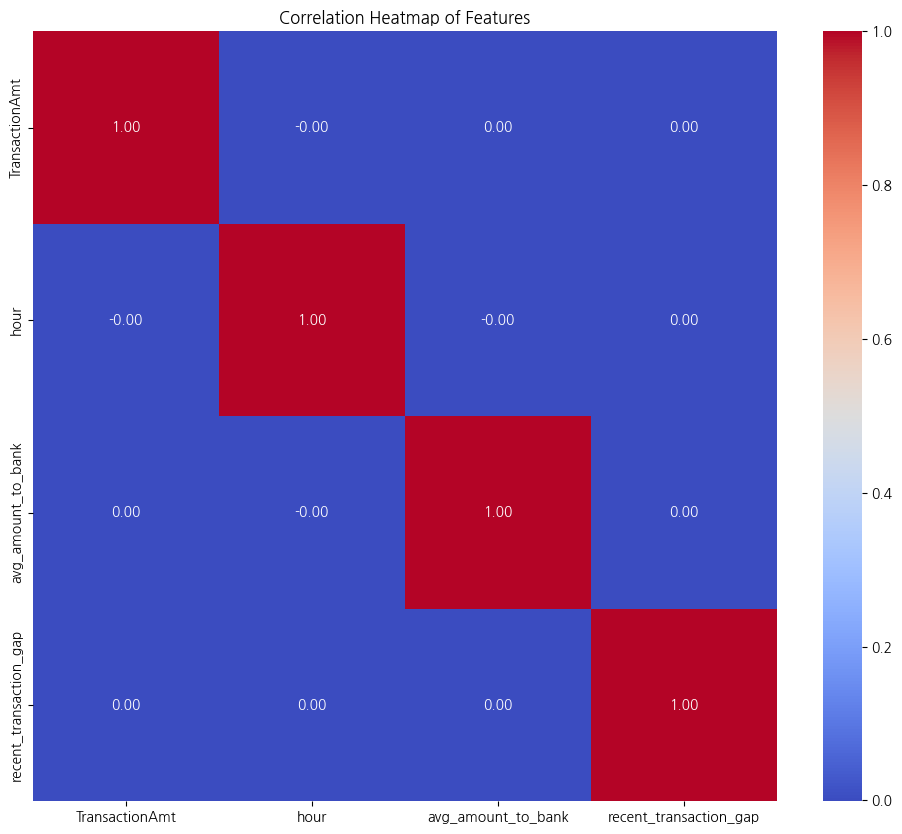

In [32]:
# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

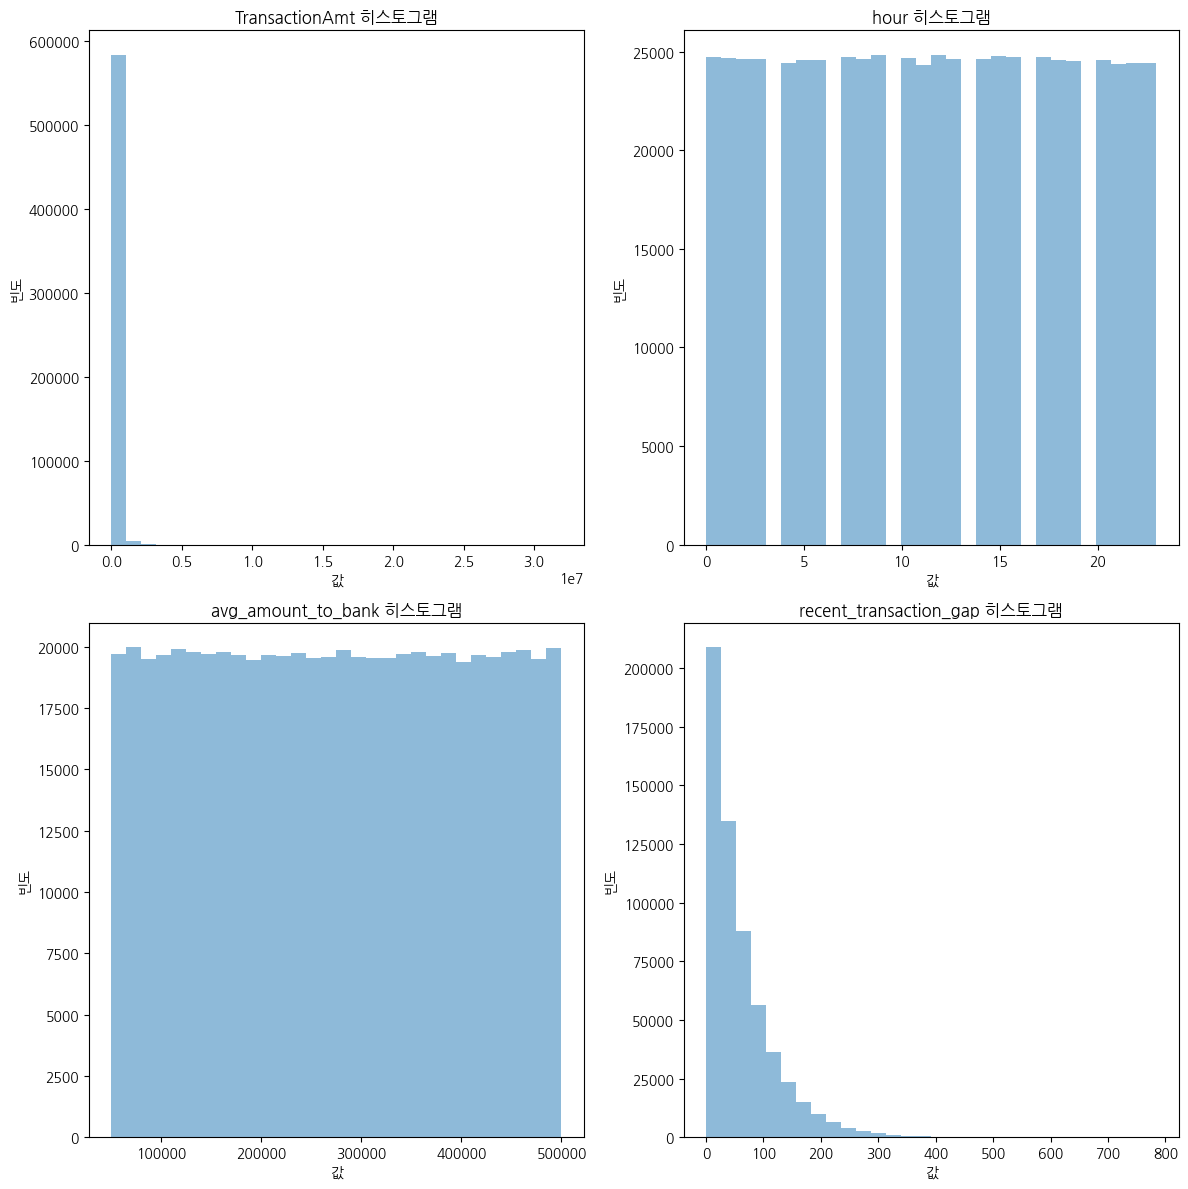

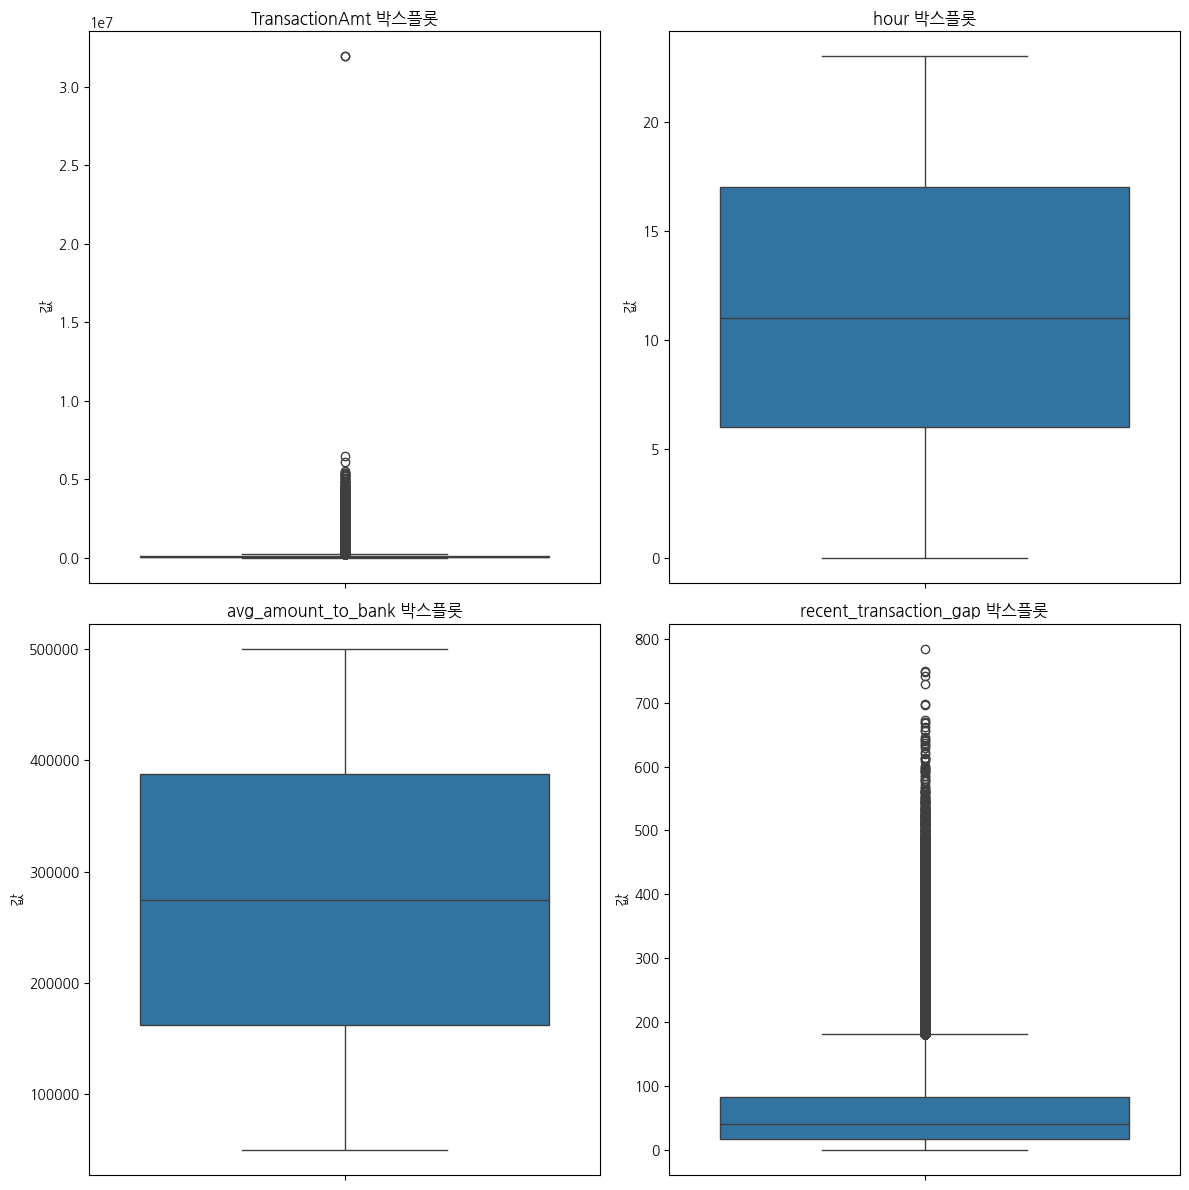

In [33]:
# 히스토그램 (서브플롯으로 분리, 2열 배치)
num_cols = len(heatmap_df.columns)
num_rows = (num_cols + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

# 각 컬럼에 대한 히스토그램 생성
for i, col in enumerate(heatmap_df.columns):
    row = i // 2
    col_index = i % 2
    ax = axes[row, col_index]

    ax.hist(heatmap_df[col], bins=30, alpha=0.5)
    ax.set_title(f'{col} 히스토그램')
    ax.set_xlabel('값')
    ax.set_ylabel('빈도')

# 빈 슬롯 삭제
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()

# 박스플롯 (서브플롯으로 분리, 2열 배치)
num_cols = len(heatmap_df.columns)
num_rows = (num_cols + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

# 각 컬럼에 대한 박스플롯 생성
for i, col in enumerate(heatmap_df.columns):
    row = i // 2
    col_index = i % 2
    ax = axes[row, col_index]

    sns.boxplot(y=heatmap_df[col], ax=ax)
    ax.set_title(f'{col} 박스플롯')
    ax.set_ylabel('값')

# 빈 슬롯 삭제
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()

In [27]:
df_mapping.head(1)

,transaction_time,TransactionDT,recipient,TransactionAmt,hour,DeviceInfo,region,receiver_bank,receiver_account,avg_amount_to_bank,amount_ratio_to_bank_avg,recent_transaction_gap,ip_address,app_version,voice_match,is_new_account_for_user,is_nighttime,is_new_device,vpn,rooting,payment_method_P02,payment_method_P03,payment_method_P04,payment_method_P05,payment_method_P06,intent_T02,intent_T03,intent_T04,intent_T05,authentication_A02,authentication_A03,authentication_A04,authentication_A05,authentication_A06
0,2025-01-14 09:56:23,86400,춘자,68500.0,9,Unknown,대구,토스뱅크,1000000266274,481616,0.142229,14.932585,58.232.2.170,3.1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


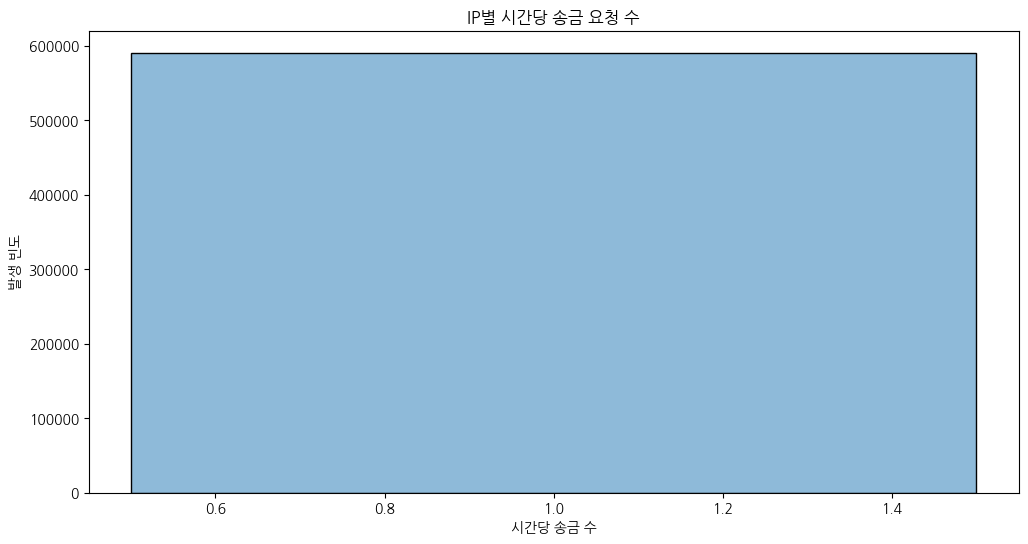

In [34]:
# ip주소 기준 거래 시간, 거래 횟수 grouping
df_mapping['transaction_time'] = pd.to_datetime(df_mapping['transaction_time'])
hourly_transactions = df_mapping.groupby(['ip_address', pd.Grouper(key='transaction_time', freq='h')]).size().reset_index(name='transaction_count')

# 거래 빈도 분포
plt.figure(figsize=(12, 6))
sns.histplot(hourly_transactions['transaction_count'], kde=True)
plt.title('IP별 시간당 송금 요청 수')
plt.xlabel('시간당 송금 수')
plt.ylabel('발생 빈도')
plt.show()

#### Categorial

In [35]:
cat_df

,voice_match,is_new_account_for_user,is_nighttime,is_new_device,vpn,rooting,payment_method_P02,payment_method_P03,payment_method_P04,payment_method_P05,payment_method_P06,intent_T02,intent_T03,intent_T04,intent_T05,authentication_A02,authentication_A03,authentication_A04,authentication_A05,authentication_A06
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
590536,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
590537,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
590538,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0


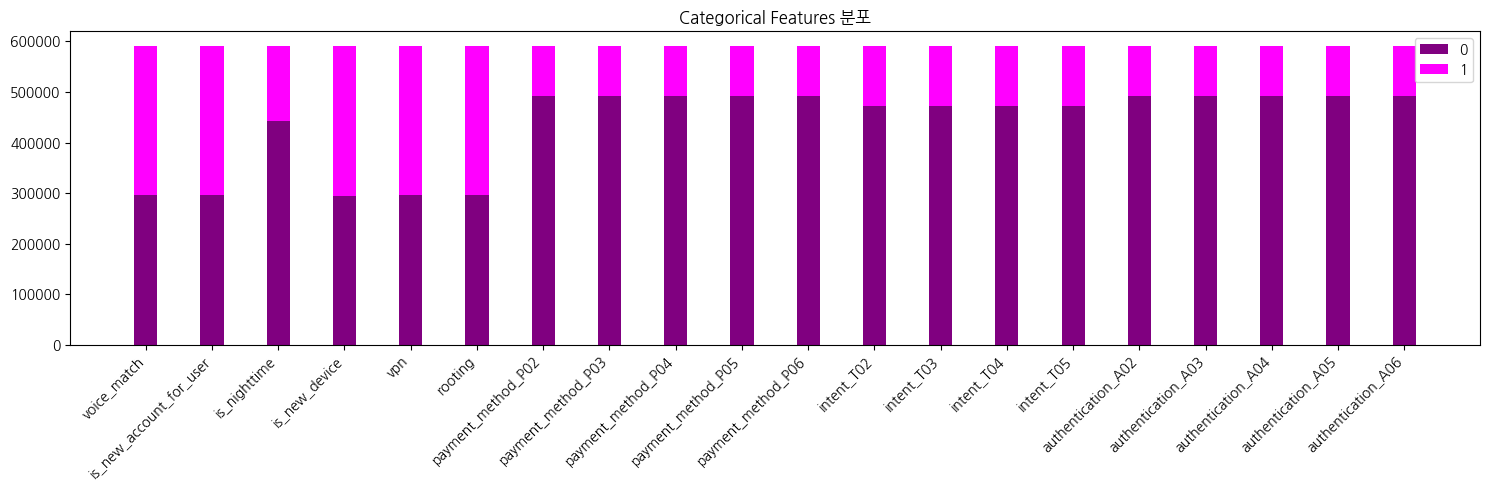

In [36]:
# cat_df의 각 컬럼별 값의 개수를 세어 데이터프레임 생성
cat_counts = cat_df.apply(pd.value_counts).T.fillna(0)

# 컬럼명을 index로 이동
cat_counts = cat_counts.reset_index().rename(columns={'index': 'Category'})

# --- 누적 막대 그래프 생성 (단일 플롯) ---
fig, ax = plt.subplots(figsize=(15, 5))  # 단일 플롯 생성

# 각 컬럼에 대해 0과 1 값을 분리하여 누적 막대 생성
width = 0.35  # 막대 너비 조정
x_pos = np.arange(len(cat_counts['Category']))  # x축 위치 설정

# 컬럼별 색상 지정 (선택 사항)
colors = ['purple', 'magenta'] #'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'gray'

bottom = np.zeros(len(cat_counts['Category']))  # 누적 막대 시작 위치 초기화

for i, col in enumerate(cat_counts.columns[1:]):  # 'Category' 컬럼 제외
    values = cat_counts[col]  # 해당 컬럼의 값들

    # 0 값과 1 값을 분리하지 않고 전체 값을 사용하여 막대 생성
    ax.bar(x_pos, values, width, bottom=bottom, color=colors[i % len(colors)], label=col)

    bottom += values  # 다음 컬럼 막대의 시작 위치 업데이트

ax.set_xticks(x_pos)
ax.set_xticklabels(cat_counts['Category'], rotation=45, ha='right')

ax.set_title('Categorical Features 분포')
ax.legend()
plt.tight_layout()
plt.show()

## 데이터셋 저장

In [37]:
df_mapping.to_csv('/content/drive/MyDrive/FDS/df_mapping.csv', index=False)